----- Linear Regression -----
Mean Absolute Error: 2.34
Mean Squared Error: 7.21
Root Mean Squared Error: 2.69
R² Score: 0.0001

Best Polynomial Model: Degree 3
----- Polynomial Regression (Best) -----
Mean Absolute Error: 2.34
Mean Squared Error: 7.19
Root Mean Squared Error: 2.68
R² Score: 0.0035


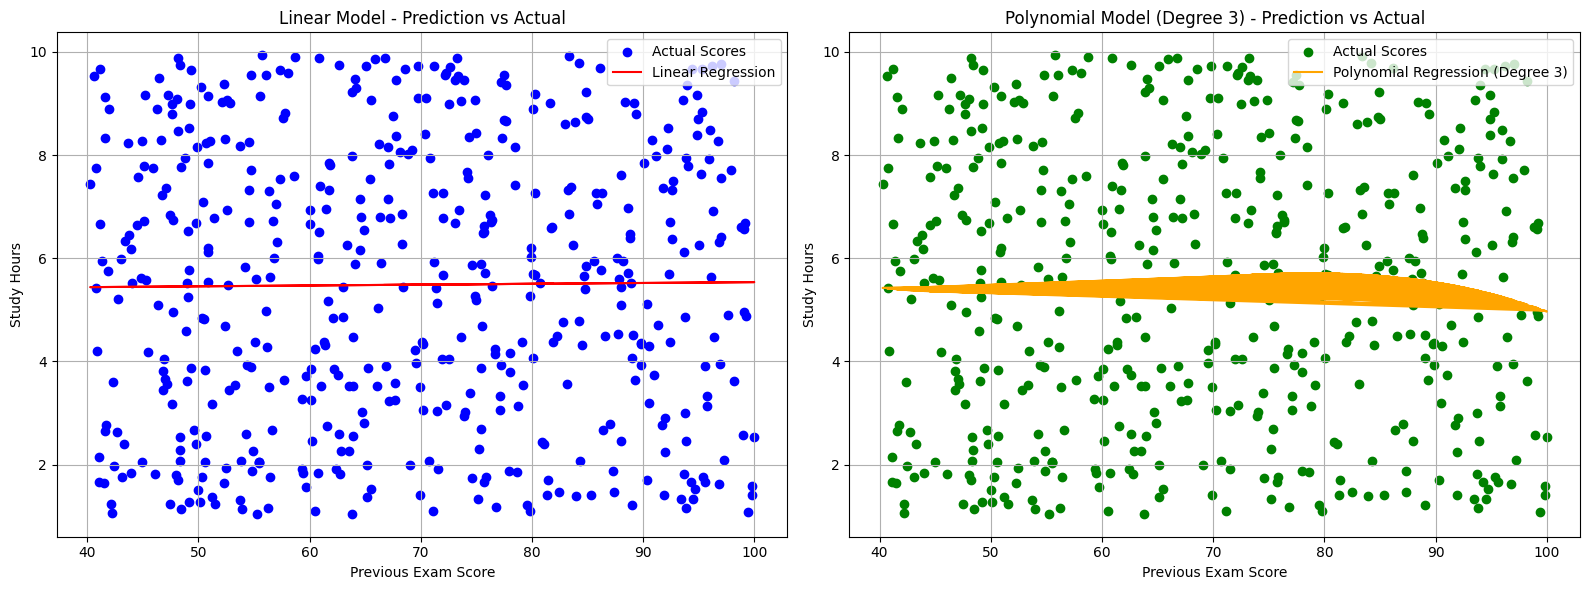

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('student_exam_data.csv')
x = data[['Previous Exam Score']]
y = data['Study Hours']

linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

mae_linear = mean_absolute_error(y, y_pred_linear)
mse_linear = mean_squared_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y, y_pred_linear)

print("----- Linear Regression -----")
print('Mean Absolute Error:', round(mae_linear, 2))
print('Mean Squared Error:', round(mse_linear, 2))
print('Root Mean Squared Error:', round(rmse_linear, 2))
print('R² Score:', round(r2_linear, 4))

poly2_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly2_model.fit(x, y)
y_pred_poly2 = poly2_model.predict(x)

mae_poly2 = mean_absolute_error(y, y_pred_poly2)
mse_poly2 = mean_squared_error(y, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y, y_pred_poly2)

poly3_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_model.fit(x, y)
y_pred_poly3 = poly3_model.predict(x)


mae_poly3 = mean_absolute_error(y, y_pred_poly3)
mse_poly3 = mean_squared_error(y, y_pred_poly3)
rmse_poly3 = np.sqrt(mse_poly3)
r2_poly3 = r2_score(y, y_pred_poly3)

if r2_poly3 > r2_poly2:
    best_model = poly3_model
    y_pred_poly = y_pred_poly3
    best_degree = 3
    r2_poly = r2_poly3
    print("\nBest Polynomial Model: Degree 3")
else:
    best_model = poly2_model
    y_pred_poly = y_pred_poly2
    best_degree = 2
    r2_poly = r2_poly2
    print("\nBest Polynomial Model: Degree 2")
print("----- Polynomial Regression (Best) -----")
print('Mean Absolute Error:', round(mean_absolute_error(y, y_pred_poly), 2))
print('Mean Squared Error:', round(mean_squared_error(y, y_pred_poly), 2))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y, y_pred_poly)), 2))
print('R² Score:', round(r2_poly, 4))
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual Scores')
plt.plot(x, y_pred_linear, color='red', label='Linear Regression')
plt.title('Linear Model - Prediction vs Actual')
plt.xlabel('Previous Exam Score')
plt.ylabel('Study Hours')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='green', label='Actual Scores')
plt.plot(x, y_pred_poly, color='orange', label=f'Polynomial Regression (Degree {best_degree})')
plt.title(f'Polynomial Model (Degree {best_degree}) - Prediction vs Actual')
plt.xlabel('Previous Exam Score')
plt.ylabel('Study Hours')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()